# Joe Dominik's Making A Harmonic DJ Set - Real Life Application and Analysis 

This notebook explains the set I produce using my own credentials and playlist.


## Importing needed libraries to construct harmonic set

Note: I have a playlist on Spotify that is filled with house / dance music that I am wanting to make a harmonic set out of.

In [2]:
#spotipy for Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#matplotlib.pyplot for EDA
import matplotlib.pyplot as plt
#pandas for dataframe needs
import pandas as pd
import random
import copy
#client credentials
client_id = 'insert here'
client_secret= 'insert here'
#user id
user = 'insert here'
#house playlist id
house_playlist_id = 'spotify:playlist:6NkmnrWAo0HuOdLMfodDxP'

## Using Camelot Score Dictionary

In [3]:
camelot_scores = {
    (0,1):'8B',
    (1,1):'3B',
    (2,1):'10B',
    (3,1):'5B',
    (4,1):'12B',
    (5,1):'7B',
    (6,1):'2B',
    (7,1):'9B',
    (8,1):'4B',
    (9,1):'11B',
    (10,1):'6B',
    (11,1):'1B',
    (0,0):'5A',
    (1,0):'12A',
    (2,0):'7A',
    (3,0):'2A',
    (4,0):'9A',
    (5,0):'4A',
    (6,0):'11A',
    (7,0):'6A',
    (8,0):'1A',
    (9,0):'8A',
    (10,0):'3A',
    (11,0):'10A',
}
def camelot_function(key, mode):
    return camelot_scores.get((key, mode))

## Populating dictionary and dataframe with the specific house playlist

In [4]:
spotify = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id = client_id,
                                                           client_secret = client_secret))
results = spotify.user_playlist_tracks(user = user, playlist_id = house_playlist_id)
tracks = results['items']
while results['next']:
    results = spotify.next(results)
    tracks.extend(results['items'])

#creating list for the house music playlist
#using lists inside a for loop is more efficient than making a dataframe and appending each time
house_list = []
house_dict = {
    '1A': [],
    '2A': [],
    '3A': [],
    '4A': [],
    '5A': [],
    '6A': [],
    '7A': [],
    '8A': [],
    '9A': [],
    '10A': [],
    '11A': [],
    '12A': [],
    '1B': [],
    '2B': [],
    '3B': [],
    '4B': [],
    '5B': [],
    '6B': [],
    '7B': [],
    '8B': [],
    '9B': [],
    '10B': [],
    '11B': [],
    '12B': [],
}
for track in tracks:
    #getting the audio features for each track
    audio_features = spotify.audio_features(track['track']['id'])
    #appending to the list the track name, artist, popularity, tempo, key, danceability, energy, and loudness
    house_list.append([track['track']['name'], track['track']['artists'][0]['name'], track['track']['popularity'], 
                       audio_features[0]['tempo'], audio_features[0]['key'], audio_features[0]['mode'], 
                       audio_features[0]['danceability'], 
                       audio_features[0]['energy'], audio_features[0]['loudness'], 
                       camelot_function(audio_features[0]['key'], audio_features[0]['mode'])])
    house_dict[camelot_function(audio_features[0]['key'], audio_features[0]['mode'])].append([track['track']['name'],
                        track['track']['artists'][0]['name'], track['track']['popularity'], 
                       audio_features[0]['tempo'], audio_features[0]['key'], audio_features[0]['mode'], 
                       audio_features[0]['danceability'], 
                       audio_features[0]['energy'], audio_features[0]['loudness'], 
                       camelot_function(audio_features[0]['key'], audio_features[0]['mode'])])
#making the dataframe after done with the for loop
house_df = pd.DataFrame(house_list, columns = ['Song Name', 'Artist', 'Popularity', 'Tempo', 'Key', 'Mode',
                                               'Danceability', 'Energy', 'Loudness', 'Camelot Score'])   

## Creating the camelot score dictionary that will be used later

In [5]:
harmony_dict = {
    '1A':['12A', '1A', '2A', '1B'],
    '2A':['1A', '2A', '3A', '2B'],
    '3A':['2A', '3A', '4A', '3B'],
    '4A':['3A', '4A', '5A', '4B'],
    '5A':['4A', '5A', '6A', '5B'],
    '6A':['5A', '6A', '7A', '6B'],
    '7A':['6A', '7A', '8A', '7B'],
    '8A':['7A', '8A', '9A', '8B'],
    '9A':['8A', '9A', '10A', '9B'],
    '10A':['9A', '10A', '11A', '10B'],
    '11A':['10A', '11A', '12A', '11B'],
    '12A':['11A', '12A', '1A', '12B'],
    '1B':['12B', '1B', '2B', '1A'],
    '2B':['1B', '2B', '3B', '2A'],
    '3B':['2B', '3B', '4B', '3A'],
    '4B':['3B', '4B', '5B', '4A'],
    '5B':['4B', '5B', '6B', '5A'],
    '6B':['5B', '6B', '7B', '6A'],
    '7B':['6B', '7B', '8B', '7A'],
    '8B':['7B', '8B', '9B', '8A'],
    '9B':['8B', '9B', '10B', '9A'],
    '10B':['9B', '10B', '11B', '10A'],
    '11B':['10B', '11B', '12B', '11A'],
    '12B':['11B', '12B', '1B', '12A'],
}
def harmony_function_2(score):
    return harmony_dict.get(score)

## Producing the set that I can use

In [6]:
house_dict_2 = copy.deepcopy(house_dict)
final_playlist_list = []
#constructing the list for the songs that satisfy the constraints later in the program
potential_song_list = []
#starting the confirmation for the first song with N
confirmation = "N"
print("This is a tool to help you build a harmonic set from your desired playlist.")
#this while loop goes until something other than N is put in (could still work on)
while(confirmation == "N"):
    #asks the user for a number between the starting and ending index of the playlist
    starting_song_index = input("To start the set please enter a number between " + str(0) +
                                " and " + str(len(house_df) - 1) + " : ")
    starting_song_index = int(starting_song_index)
    #finds the song in the data frame and asks the user if this is the correct song
    starting_song = house_df.iloc[starting_song_index]
    print("Starting song for set: " + str(starting_song['Song Name']) + " by " + str(starting_song['Artist']))
    confirmation = input("Is this correct? Type Y for yes and N for no: ")
#after finding the correct song, the tempo and camelot score of that song is found
previous_song_camelot = starting_song['Camelot Score']
previous_song_tempo = starting_song['Tempo']
starting_song = starting_song.tolist()
#the song is then removed from the value from the specific camelot score it was in
value_from_specific_camelot = house_dict_2.pop(previous_song_camelot)
value_from_specific_camelot.remove(starting_song)
#the other songs that were not affected were put back into the dictionary
house_dict_2[previous_song_camelot] = value_from_specific_camelot
#the first song is then added to the final playlist
final_playlist_list.append(starting_song)
indicator = True
#this while loop goes through the rest of the dictionary, adding to the final playlist if the constraints are met
while((len(final_playlist_list) < len(house_df)) and (indicator == True)):
    #this finds all songs that are within the 4 camelot scores of the previous song
    corresponding_camelot_scores = harmony_function_2(previous_song_camelot)
    for camelot_score in corresponding_camelot_scores:
        songs = house_dict_2[camelot_score]
        for song in songs:
            #this constraint makes sure no songs outside of 5 BPM are added to the list of potential songs
            if(abs(song[3] - previous_song_tempo) < 5):
                potential_song_list.append(song)
    #making sure the potential song list is not empty
    if(len(potential_song_list) > 0 ):
        #in order to keep randomness with the playlist, a random integer is generated
        random_int = random.randint(0,len(potential_song_list) - 1)
        #this next song is then found, the camelot score and tempo for that song are found
        next_song = potential_song_list[random_int]
        next_song_camelot = next_song[9]
        next_song_tempo = next_song[3]
        #the next song is then removed from the dictionary at the specific camelot score
        value_from_specific_camelot = house_dict_2.pop(next_song_camelot)
        value_from_specific_camelot.remove(next_song)
        house_dict_2[next_song_camelot] = value_from_specific_camelot
        #finally, the final playlist is added with the next song
        final_playlist_list.append(next_song)
        #the previous song camelot score and tempo are the next song camelot score and tempo, respectfully
        previous_song_camelot = next_song_camelot
        previous_song_tempo = next_song_tempo
        #to keep the potential song list empty, it is cleared
        potential_song_list.clear()
    else:
        indicator = False
#the final playlist dataframe is constructed to make it easier to read
playlist_df = pd.DataFrame(final_playlist_list, columns = ['Song Name', 'Artist', 'Popularity', 'Tempo', 'Key', 'Mode', 
                                                           'Danceability', 'Energy', 'Loudness', 'Camelot Score'])  
#after, the playlist dataframe is printed to make sure it works
playlist_df

This is a tool to help you build a harmonic set from your desired playlist.
To start the set please enter a number between 0 and 176 : 33
Starting song for set: Could U by GRiZ
Is this correct? Type Y for yes and N for no: Y


,Song Name,Artist,Popularity,Tempo,Key,Mode,Danceability,Energy,Loudness,Camelot Score
0,Could U,GRiZ,38,123.997,11,0,0.670,0.899,-6.729,10A
1,One Ting,Phibes,39,127.999,11,0,0.749,0.959,-1.908,10A
2,"Red Light Green Light - For Club Play Only, Pt. 6",Duke Dumont,65,124.005,2,1,0.811,0.825,-5.480,10B
3,Bloodstream - Slap House Mix,twocolors,29,123.964,2,1,0.536,0.774,-7.263,10B
4,Heat Waves - Sonny Fodera Remix,Glass Animals,53,125.007,9,1,0.609,0.869,-7.493,11B
...,...,...,...,...,...,...,...,...,...,...
103,Domino,Oxia,53,128.879,3,0,0.785,0.690,-10.225,2A
104,Thunder & Lightning,Lee Foss,33,128.001,3,0,0.788,0.815,-9.437,2A
105,Talk About,Rain Radio,72,123.992,6,1,0.814,0.874,-5.316,2B
106,Turn Me On (feat. Vula),Riton,73,124.051,11,1,0.737,0.828,-4.711,1B


## Analysis on set made

Average Danceability: 0.7160462962962967
Average Energy: 0.8140277777777778
Average Loudness: -6.212268518518521


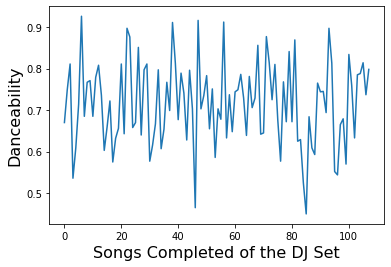

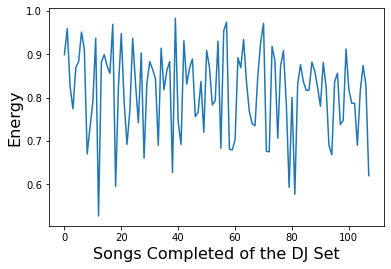

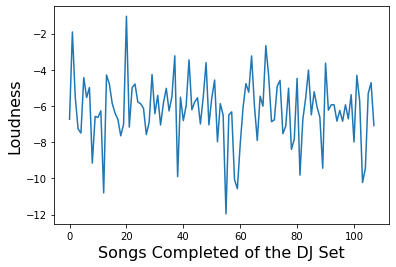

In [8]:
print("Average Danceability: " + str(playlist_df["Danceability"].mean()))
print("Average Energy: " + str(playlist_df["Energy"].mean()))
print("Average Loudness: " + str(playlist_df["Loudness"].mean()))
plt.plot(playlist_df['Danceability'])
plt.xlabel('Songs Completed of the DJ Set', size=16)
plt.ylabel('Danceability', size=16)
plt.show()
plt.plot(playlist_df['Energy'])
plt.xlabel('Songs Completed of the DJ Set', size=16)
plt.ylabel('Energy', size=16)
plt.show()
plt.plot(playlist_df['Loudness'])
plt.xlabel('Songs Completed of the DJ Set', size=16)
plt.ylabel('Loudness', size=16)
plt.show()

From the set that was made, the Danceability, Energy, and Loudness were all plotted throughout the set. Although all of these have staggered patterns, DJs do have to change these during the set to keep the set unique and different.